## Import Library 

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset & Data Understanding

In [71]:
# Load dataset
df = pd.read_csv("Students_Performance_mv.csv")

# ---- Tampilkan 5 data awal ----
print("10 Data Awal:")
print(df.head(10), "\n")

# ---- Informasi dataset ----
print("Info Dataset:")
df.info()
print("\n")

# ---- Ringkasan statistik ----
print("Ringkasan Statistik:")
print(df.describe(include="all"), "\n")

# ---- Cek missing values ----
print("Jumlah Missing Values per Kolom:")
missing = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_table = pd.DataFrame({
    "Missing Values": missing,
    "Persentase (%)": missing_percent
})
print(missing_table)

10 Data Awal:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   
5  female        group B          associate's degree      standard   
6  female        group B                some college      standard   
7    male        group B                some college  free/reduced   
8    male        group D                 high school  free/reduced   
9  female        group B                 high school  free/reduced   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2    

## Imputasi Missing Values

In [ ]:
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

print("Kolom numerik:", list(num_cols))
print("Kolom kategorikal:", list(cat_cols))

# 2. Cek missing values di tiap tipe
print(df[num_cols].isnull().sum())
print(df[cat_cols].isnull().sum())

# Missing values yang ada di kolom numerik  akan digantikan dengan median kolom tersebut
num_impute = {col: df[col].median() for col in num_cols}
# Sedangkan untuk kolom kategorik akan digantikan dengan mode kolom tersebut
cat_impute = {col: df[col].mode()[0] for col in cat_cols}

# Gabung
impute_dict = {**num_impute, **cat_impute}

# Isi missing values sesuai tipe kolom
df = df.fillna(value=impute_dict)


Kolom numerik: ['math score', 'reading score', 'writing score']
Kolom kategorikal: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
math score       0
reading score    0
writing score    0
dtype: int64
gender                          0
race/ethnicity                 11
parental level of education    21
lunch                          12
test preparation course         4
dtype: int64


## Hapus Data yang Salah/Error

In [ ]:
# Hapus nilai ujian yang tidak logis (misal kurang dari 0 atau lebih dari 100)
for col in num_cols:
    df = df[(df[col] >= 0) & (df[col] <= 100)]

## Menghitung & Menghapus Outlier dengan IQR

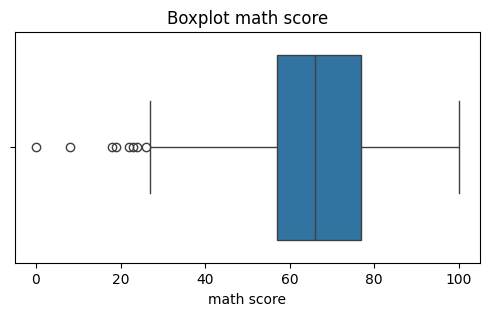

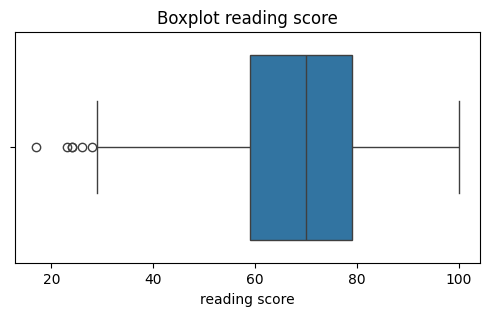

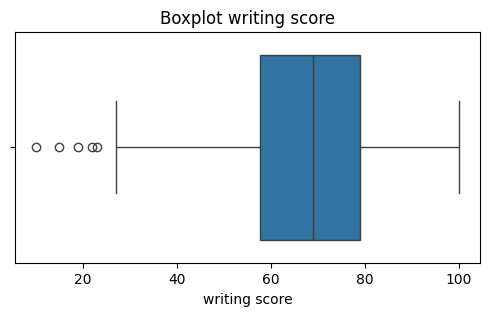

math score: 8 outlier(s)
reading score: 6 outlier(s)
writing score: 5 outlier(s)


In [ ]:
# 1. Boxplot untuk melihat outlier
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')
    plt.show()

# 2. Hitung outlier menggunakan IQR
def count_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((data[column] < lower) | (data[column] > upper)).sum()

# Hitung semua kolom numerik
for col in num_cols:
    outliers = count_outliers_iqr(df, col)
    print(f"{col}: {outliers} outlier(s)")


In [68]:
print(df.isnull().sum())
df.head(1000)


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
